In [1]:
using Gadfly
using Convex
using ECOS
using Interact
using Colors

  likely near /home/j1/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/j1/.julia/v0.4/Interact/src/IJulia/setup.jl:157


In [2]:
function minimize_cost(X,y,λ,L,P)
    w = Variable(size(X,2),size(y,2))
    problem = minimize(L(w,X,y)+λ*P(w))
    solve!(problem, ECOSSolver(verbose=false))
    w.value
end

minimize_cost (generic function with 1 method)

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/j1/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/j1/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/j1/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


Interact.Slider{Float64}([Reactive.Input{Float64}] 0.75,"λ",0.75,0.0:0.01:1.5)

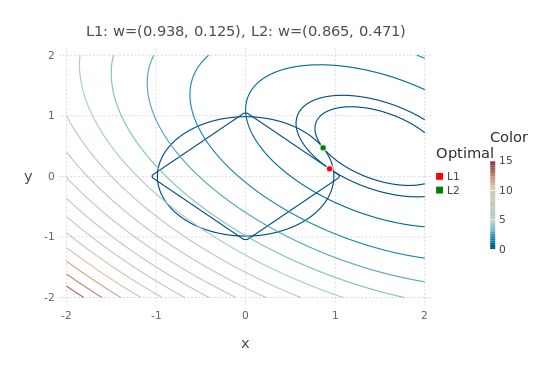

In [3]:
X = [1.0 0.5;0.0 1;]
y = [1.75, 0.5]

# Loss function
L(w,X,y) = 0.5*norm(X*w-y,2)^2

# L1-norm penalty
p1(w) = norm(w,1)

# L2-norm penalty
p2(w) = 0.5*norm(w,2)^2 

@manipulate for λ=0.0:0.01:1.5
    w_L1 = minimize_cost(X,y,λ,L,p1)
    w_L2 = minimize_cost(X,y,λ,L,p2)
    
    rx = ry = linspace(-2,2,100)
    plot(
    layer(x=[w_L1[1]],y=[w_L1[2]],Geom.point,Theme(default_color=colorant"red")),
    layer(x=[w_L2[1]],y=[w_L2[2]],Geom.point,Theme(default_color=colorant"green")),
    layer(z=(a,b)->L([a,b],X,y), x=rx, y=ry, Geom.contour),
    layer(z=(a,b)->L([a,b],X,y), x=rx, y=ry, Geom.contour(levels=L(w_L1,X,y))),
    layer(z=(a,b)->L([a,b],X,y), x=rx, y=ry, Geom.contour(levels=L(w_L2,X,y))),
    layer(z=(a,b)->p1([a,b]), x=rx, y=ry, Geom.contour(levels=p1(w_L1))),
    layer(z=(a,b)->p2([a,b]), x=rx, y=ry, Geom.contour(levels=p2(w_L2))),
    Guide.title(@sprintf("L1: w=(%1.3f, %1.3f), L2: w=(%1.3f, %1.3f)",w_L1[1],w_L1[2],w_L2[1],w_L2[2])),
    Guide.manual_color_key("Optimal", ["L1", "L2"], [colorant"red", colorant"green"]),
    )
end